In [1]:
!nvidia-smi

Sun Mar  5 03:36:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!git clone https://github.com/iteam1/anomal.git

Cloning into 'anomal'...
remote: Enumerating objects: 648, done.
remote: Counting objects: 100% (458/458), done.
remote: Compressing objects: 100% (380/380), done.
remote: Total 648 (delta 113), reused 411 (delta 71), pack-reused 190
Receiving objects: 100% (648/648), 65.97 MiB | 26.66 MiB/s, done.
Resolving deltas: 100% (147/147), done.


In [3]:
!pip install anomalib==0.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.9/346.9 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.1/569.1 KB 44.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 529.7/529.7 KB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.6/183.6 KB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.8/827.8 KB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 551.6/551.6 KB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/1

In [4]:
!pip install -r /content/anomal/requirements/openvino.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.5/904.5 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 105.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 101.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 KB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.1/239.1 KB 

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import os
import yaml
import random
import pprint
import glob
import cv2

In [6]:
import anomalib
from pytorch_lightning import Trainer, seed_everything
from anomalib.config import get_configurable_parameters
from anomalib.data import get_datamodule
from anomalib.models import get_model
from anomalib.utils.callbacks import LoadModelCallback,get_callbacks
from anomalib.utils.loggers import configure_logger, get_experiment_logger

To use wandb logger install it using `pip install wandb`


In [7]:
import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.version())
print(torch.cuda.is_available())
print(torch.cuda.device_count())
#print(torch.cuda.current_device())
#print(torch.cuda.device(0))
#print(torch.cuda.get_device_name(0))

1.13.1+cu116
11.6
8302
True
1


In [8]:
!pwd

/content


In [9]:
%cd anomal

/content/anomal


In [10]:
CONFIG_PATHS = '/content/anomal/anomalib/models'
MY_CONFIG_PATHS = '/content/anomal/configs'
MODEL_CONFIG_PATHS = {
    'patchcore': f'{CONFIG_PATHS}/patchcore/config.yaml',
    'padim': f'{CONFIG_PATHS}/padim/config.yaml',
    'cflow': f'{CONFIG_PATHS}/cflow/config.yaml',
    'dfkde': f'{CONFIG_PATHS}/dfkde/config.yaml',
    'dfm': f'{CONFIG_PATHS}/dfm/config.yaml',
    'ganomaly': f'{CONFIG_PATHS}/ganomaly/config.yaml',
    'stfpm': f'{CONFIG_PATHS}/stfpm/config.yaml',
    'fastflow': f'{CONFIG_PATHS}/fastflow/config.yaml',
    'draem': f'{CONFIG_PATHS}/draem/config.yaml',
    'reverse_distillation': f'{CONFIG_PATHS}/reverse_distillation/config.yaml'
}

In [11]:
# quick look config file
model = 'patchcore'
print(open(MODEL_CONFIG_PATHS[model],'r').read())

dataset:
  name: mvtec
  format: mvtec
  path: ./datasets/MVTec
  task: segmentation
  category: bottle
  train_batch_size: 32
  test_batch_size: 32
  num_workers: 8
  image_size: 256 # dimensions to which images are resized (mandatory)
  center_crop: 224 # dimensions to which images are center-cropped after resizing (optional)
  normalization: imagenet # data distribution to which the images will be normalized: [none, imagenet]
  transform_config:
    train: null
    eval: null
  test_split_mode: from_dir # options: [from_dir, synthetic]
  test_split_ratio: 0.2 # fraction of train images held out testing (usage depends on test_split_mode)
  val_split_mode: same_as_test # options: [same_as_test, from_test, synthetic]
  val_split_ratio: 0.5 # fraction of train/test images held out for validation (usage depends on val_split_mode)
  tiling:
    apply: false
    tile_size: null
    stride: null
    remove_border_count: 0
    use_random_tiling: False
    random_tile_count: 16

model:
  name

In [12]:
# Update config
new_update = {
    'path': '/content/anomal/anomalib/models',
    'category':'hazelnut',
    'image_size': 256,
    'train_batch_size': 48,
    'seed': 101
}

In [13]:
# update yaml key's value
def set_state(old,key,value):
  temp = []
  if isinstance(old,dict):
    for k,v in old.items():
      if k == 'project':
        temp.append(k)
      if k == key:
        if temp and k == 'path':
          continue # right now, we don't wanna change project path
        old[k] = value
      elif isinstance(v,dict):
        # recursive
        set_state(v,key,value)

def update_yaml(old_config,new_config,new_update):
  # load yaml
  with open(old_config) as f:
    old = yaml.safe_load(f)
    # interate over the new update key-value  pari
    for key,value in new_update.items():
      set_state(old,key,value)
    # save the updated modifiled yaml file
    with open(new_config,'w') as f:
      yaml.safe_dump(old,f,default_flow_style=False)

In [14]:
# let's set a new path location of new config file
new_yaml = os.path.join(MY_CONFIG_PATHS,model+'_custom.yaml')
new_yaml

'/content/anomal/configs/patchcore_custom.yaml'

In [15]:
# run the update yaml method to update desired key;s values
update_yaml(MODEL_CONFIG_PATHS[model],new_yaml,new_update)

In [16]:
with open(new_yaml) as f:
  updated_config = yaml.safe_load(f)
pprint.pprint(updated_config)

{'dataset': {'category': 'hazelnut',
             'center_crop': 224,
             'format': 'mvtec',
             'image_size': 256,
             'name': 'mvtec',
             'normalization': 'imagenet',
             'num_workers': 8,
             'path': '/content/anomal/anomalib/models',
             'task': 'segmentation',
             'test_batch_size': 32,
             'test_split_mode': 'from_dir',
             'test_split_ratio': 0.2,
             'tiling': {'apply': False,
                        'random_tile_count': 16,
                        'remove_border_count': 0,
                        'stride': None,
                        'tile_size': None,
                        'use_random_tiling': False},
             'train_batch_size': 48,
             'transform_config': {'eval': None, 'train': None},
             'val_split_mode': 'same_as_test',
             'val_split_ratio': 0.5},
 'logging': {'log_graph': False, 'logger': []},
 'metrics': {'image': ['F1Score', 'AUROC'],

In [17]:
# start training
if updated_config['project']['seed'] != 0:
  print(updated_config['project']['seed'])
  seed_everything(updated_config['project']['seed'])

INFO:lightning_fabric.utilities.seed:Global seed set to 101


101


In [18]:
# return the configurable parameters in DictConfig object
config = get_configurable_parameters(
    model_name = updated_config['model']['name'],
    config_path = new_yaml
)
config

/usr/local/lib/python3.8/dist-packages/anomalib/config/config.py:153: DeprecationWarning: The 'test_batch_size' parameter is deprecated and will be removed in a future release. Please use 'eval_batch_size' instead.
  warn(
/usr/local/lib/python3.8/dist-packages/anomalib/config/config.py:275: UserWarning: config.project.unique_dir is set to False. This does not ensure that your results will be written in an empty directory and you may overwrite files.
  warn(


{'dataset': {'category': 'hazelnut', 'center_crop': [224, 224], 'format': 'mvtec', 'image_size': [256, 256], 'name': 'mvtec', 'normalization': 'imagenet', 'num_workers': 8, 'path': '/content/anomal/anomalib/models', 'task': 'segmentation', 'test_batch_size': 32, 'test_split_mode': 'from_dir', 'test_split_ratio': 0.2, 'tiling': {'apply': False, 'random_tile_count': 16, 'remove_border_count': 0, 'stride': None, 'tile_size': None, 'use_random_tiling': False}, 'train_batch_size': 48, 'transform_config': {'eval': None, 'train': None}, 'val_split_mode': 'same_as_test', 'val_split_ratio': 0.5, 'eval_batch_size': 32}, 'logging': {'log_graph': False, 'logger': []}, 'metrics': {'image': ['F1Score', 'AUROC'], 'pixel': ['F1Score', 'AUROC'], 'threshold': {'manual_image': None, 'manual_pixel': None, 'method': 'adaptive'}}, 'model': {'backbone': 'wide_resnet50_2', 'coreset_sampling_ratio': 0.1, 'layers': ['layer2', 'layer3'], 'name': 'patchcore', 'normalization_method': 'min_max', 'num_neighbors': 9,

In [19]:
# pass the config to model logger,callbacks, and datamodule
model = get_model(config)
experiment_logger = get_experiment_logger(config)
callbacks = get_callbacks(config)
datamodule = get_datamodule(config)

/usr/local/lib/python3.8/dist-packages/torchmetrics/utilities/prints.py:36: DeprecationWarning: From v0.10 an `'Binary*'`, `'Multiclass*', `'Multilabel*'` version now exist of each classification metric. Moving forward we recommend using these versions. This base metric will still work as it did prior to v0.10 until v0.11. From v0.11 the `task` argument introduced in this metric will be required and the general order of arguments may change, such that this metric will just function as an single entrypoint to calling the three specialized versions.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/wide_resnet50_racm-8234f177.pth" to /root/.cache/torch/hu

In [20]:
# start training
trainer = Trainer(**config.trainer,logger=experiment_logger,callbacks=callbacks)
trainer

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(limit_train_batches=1.0)` was configured so 100% of the batches per epoch will be used..
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(limit_val_batches=1.0)` was configured so 100% of the batches will be used..
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(limit_test_batches=1.0)` was configured so 100% of the batches will be used..
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(limit_predict_batches=1.0)` was configured so 100% of the batches will be used..
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training e

In [21]:
trainer.fit(model=model,datamodule=datamodule)

mvtec: 5.26GB [01:40, 52.2MB/s]                            
/usr/local/lib/python3.8/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `ROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/core/optimizer.py:183: UserWarning: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer
  rank_zero_warn(
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | image_threshold       | AnomalyScoreThreshold    | 0     
1 | pixel_threshold       | AnomalyScoreThreshold    | 0     
2 | model                 | PatchcoreModel           | 24.9 M
3 | image_metrics         | AnomalibMetricColl

Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/loops/optimization/optimizer_loop.py:138: UserWarning: `training_step` returned `None`. If this was on purpose, ignore this warning...
  self.warning_cache.warn("`training_step` returned `None`. If this was on purpose, ignore this warning...")


Validation: 0it [00:00, ?it/s]

/usr/local/lib/python3.8/dist-packages/torchmetrics/utilities/prints.py:36: DeprecationWarning: `torchmetrics.functional.auc` has been move to `torchmetrics.utilities.compute` in v0.10 and will be removed in v0.11.
  warnings.warn(*args, **kwargs)
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


In [22]:
model

PatchcoreLightning(
  (image_threshold): AnomalyScoreThreshold()
  (pixel_threshold): AnomalyScoreThreshold()
  (model): PatchcoreModel(
    (feature_extractor): FeatureExtractor(
      (feature_extractor): FeatureListNet(
        (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (layer1): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (act1): ReLU(inplace=True)
            (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, trac

In [24]:
trainer.checkpoint_callback.best_model_path

'/content/anomal/anomalib/models/patchcore/mvtec/hazelnut/run/weights/model.ckpt'

'/content/anomal/anomalib/models/patchcore/mvtec/hazelnut/run/weights/model.ckpt'

In [26]:
# load best model from checkpoint before evaluating
load_model_callback = LoadModelCallback(
    weights_path = trainer.checkpoint_callback.best_model_path
)
load_model_callback

In [27]:
trainer.callbacks.insert(0,load_model_callback)

In [28]:
trainer.test(model=model,datamodule=datamodule)

/usr/local/lib/python3.8/dist-packages/torchmetrics/utilities/prints.py:36: DeprecationWarning: From v0.10 an `'Binary*'`, `'Multiclass*', `'Multilabel*'` version now exist of each classification metric. Moving forward we recommend using these versions. This base metric will still work as it did prior to v0.10 until v0.11. From v0.11 the `task` argument introduced in this metric will be required and the general order of arguments may change, such that this metric will just function as an single entrypoint to calling the three specialized versions.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `ROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning

Testing: 0it [00:00, ?it/s]

/usr/local/lib/python3.8/dist-packages/torchmetrics/utilities/prints.py:36: DeprecationWarning: `torchmetrics.functional.auc` has been move to `torchmetrics.utilities.compute` in v0.10 and will be removed in v0.11.
  warnings.warn(*args, **kwargs)


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       image_AUROC                  1.0
      image_F1Score                 1.0
       pixel_AUROC          0.9840904474258423
      pixel_F1Score         0.6174152493476868
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'pixel_F1Score': 0.6174152493476868,
  'pixel_AUROC': 0.9840904474258423,
  'image_F1Score': 1.0,
  'image_AUROC': 1.0}]

In [45]:
# visualization
RESULT_PATH = os.path.join(
    updated_config['project']['path'],
    updated_config['model']['name'],
    updated_config['dataset']['format'], 
    updated_config['dataset']['category'],
    'run'
)
RESULT_PATH

'/content/anomal/anomalib/models/patchcore/mvtec/hazelnut/run'

In [46]:
# a simple function to visualize the model's prediction (anomaly heatmap)
def vis(paths, n_images, is_random=True, figsize=(16, 16)):
    for i in range(n_images):
        image_name = paths[i]
        if is_random: image_name = random.choice(paths)
        img = cv2.imread(image_name)[:,:,::-1]
        
        category_type = image_name.split('/')[-4:-3:][0]
        defected_type = image_name.split('/')[-2:-1:][0]
        
        plt.figure(figsize=figsize)
        plt.imshow(img)
        plt.title(
            f"Category : {category_type} and Defected Type : {defected_type}", 
            fontdict={'fontsize': 20, 'fontweight': 'medium'}
        )
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
    plt.show()

In [47]:
for content in os.listdir(RESULT_PATH):
    if content == 'images':
        full_path = glob.glob(os.path.join(RESULT_PATH, content, '**',  '*.png'), recursive=True)
        print('Total Image ', len(full_path))
        print(full_path[0].split('/'))
        print(full_path[0].split('/')[-2:-1:])
        print(full_path[0].split('/')[-4:-3:])

Total Image  112
['', 'content', 'anomal', 'anomalib', 'models', 'patchcore', 'mvtec', 'hazelnut', 'run', 'images', 'pixel_ROC.png']
['images']
['hazelnut']


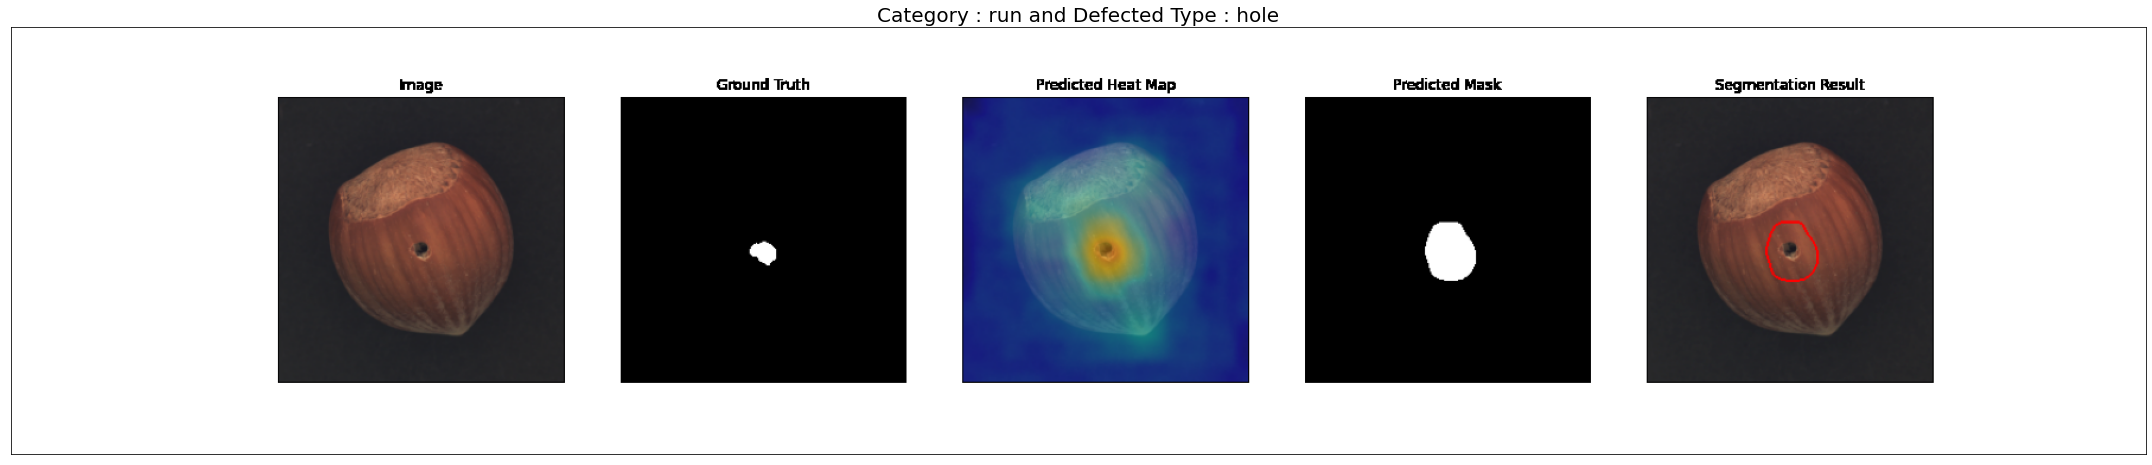

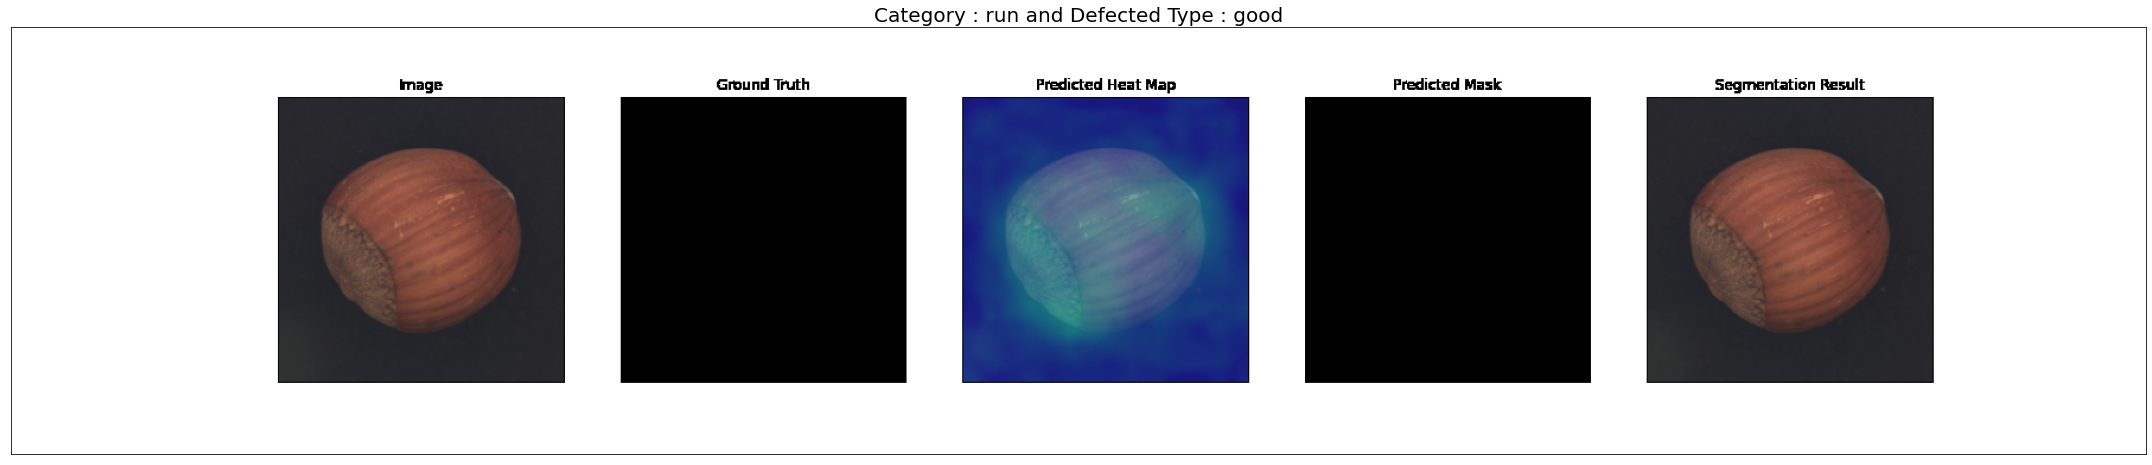

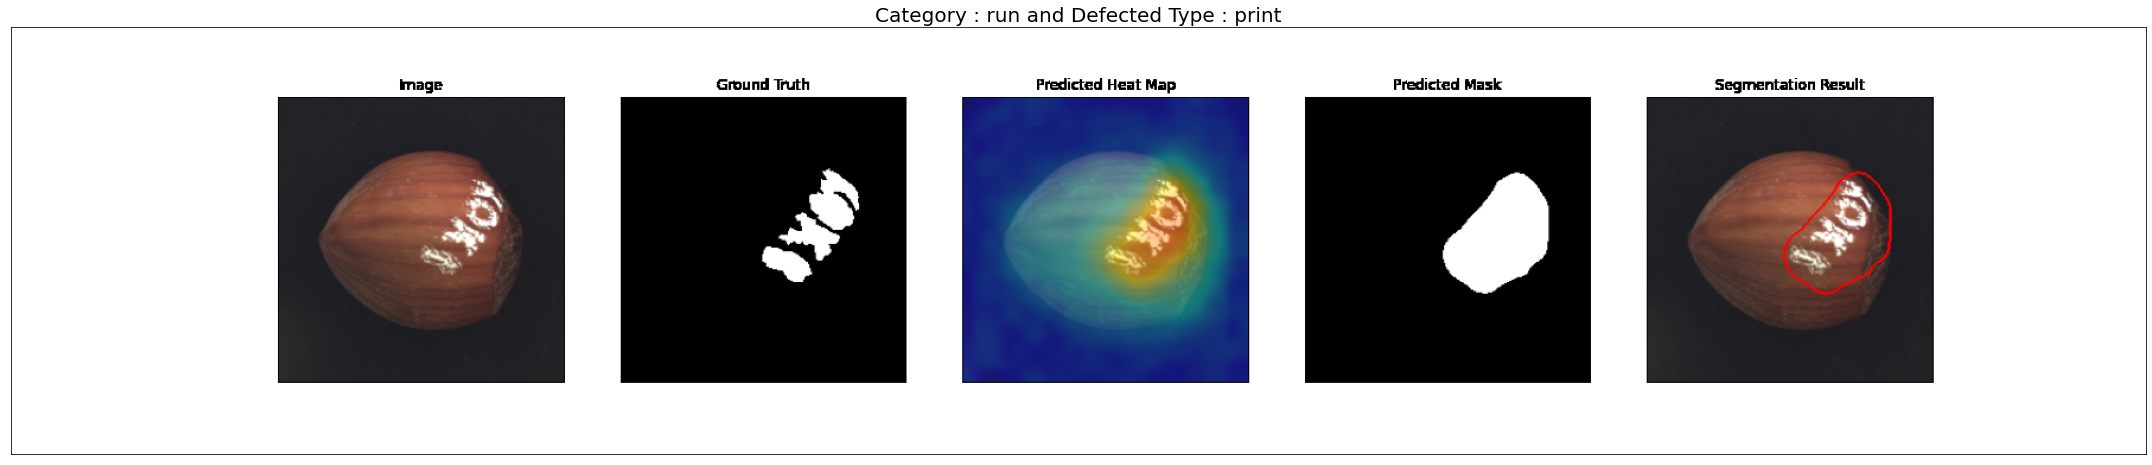

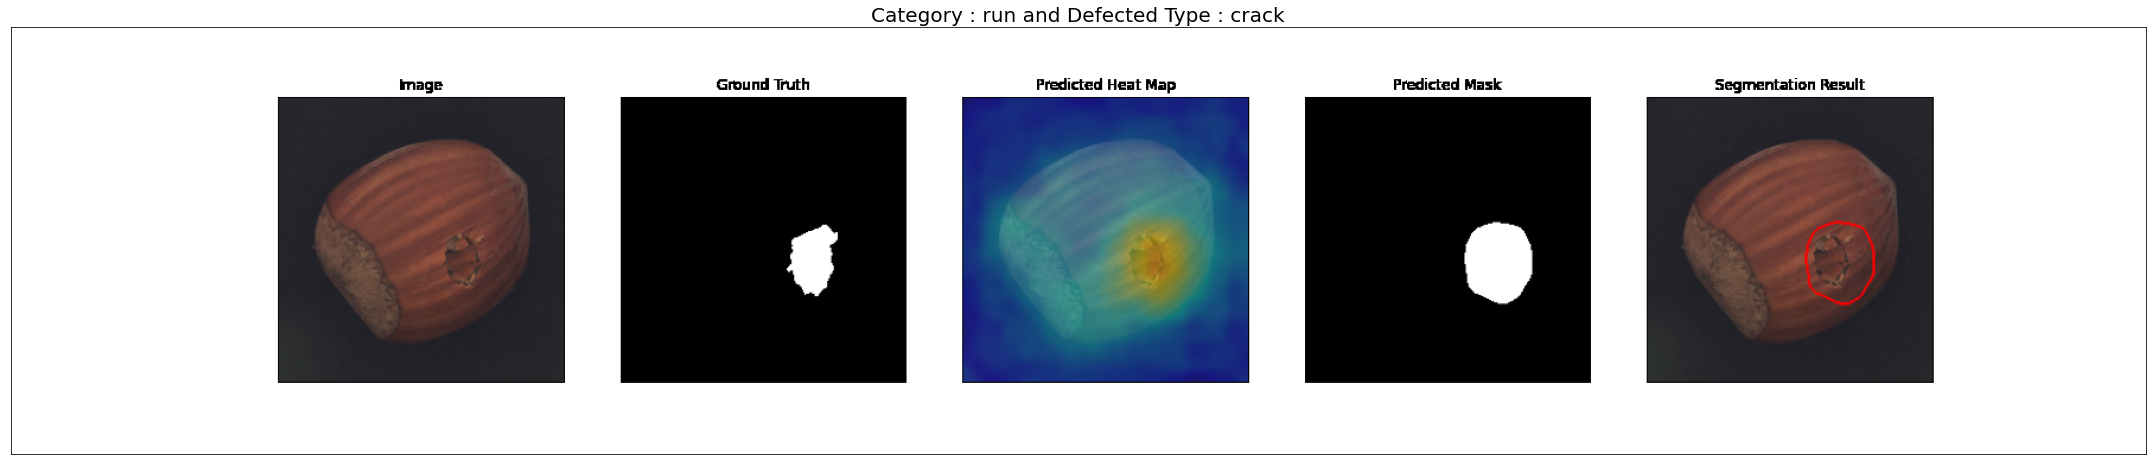

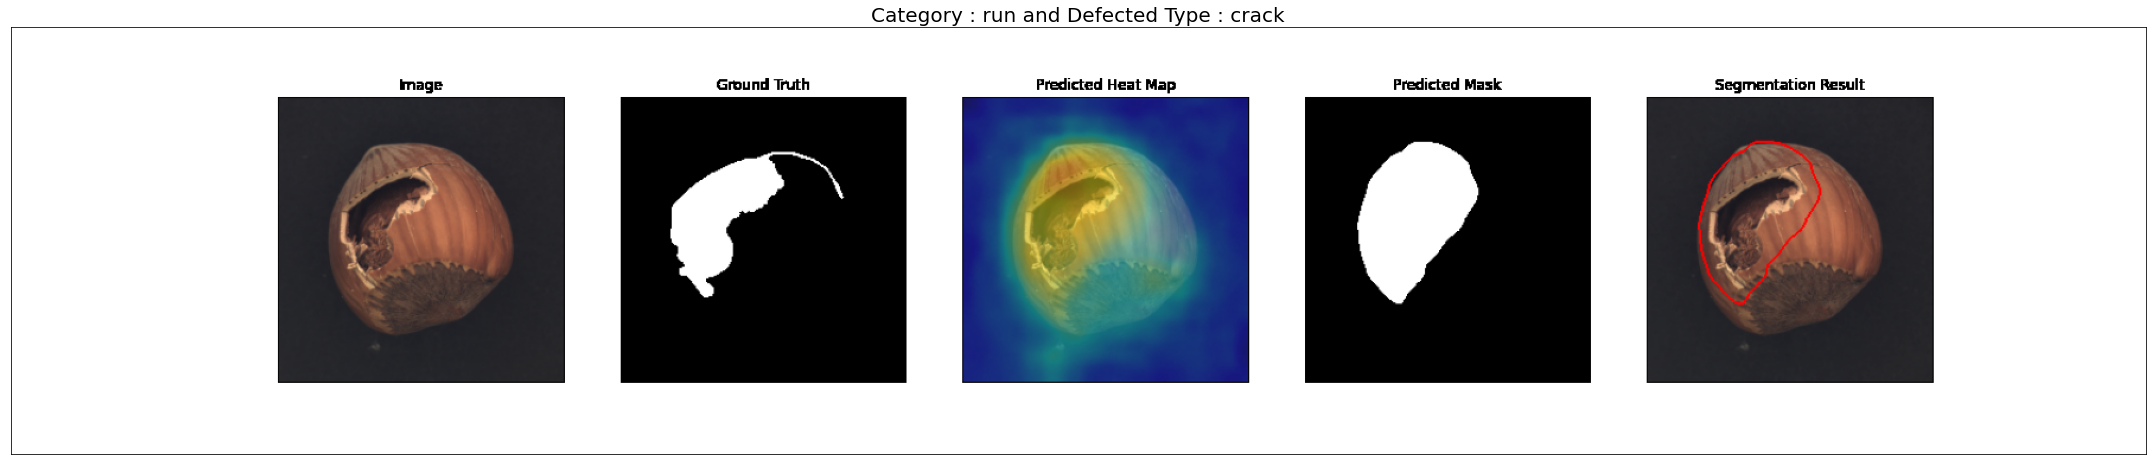

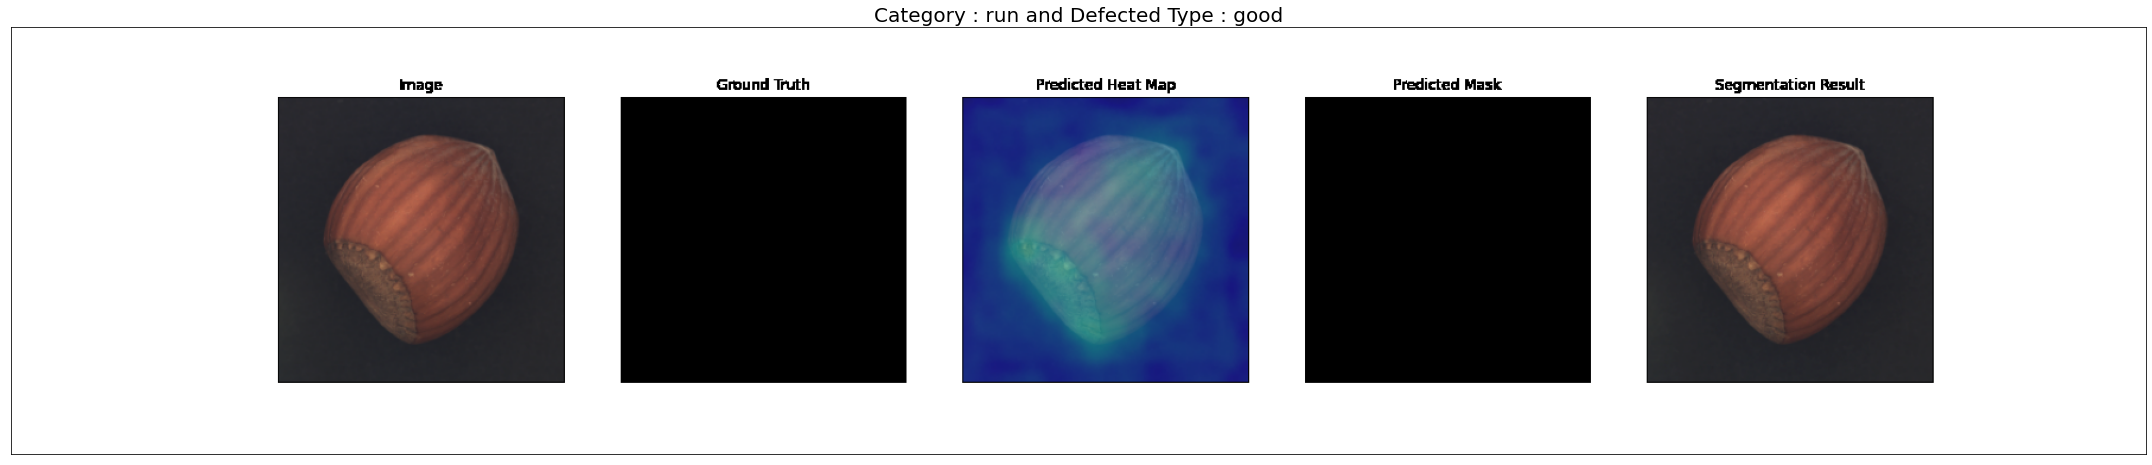

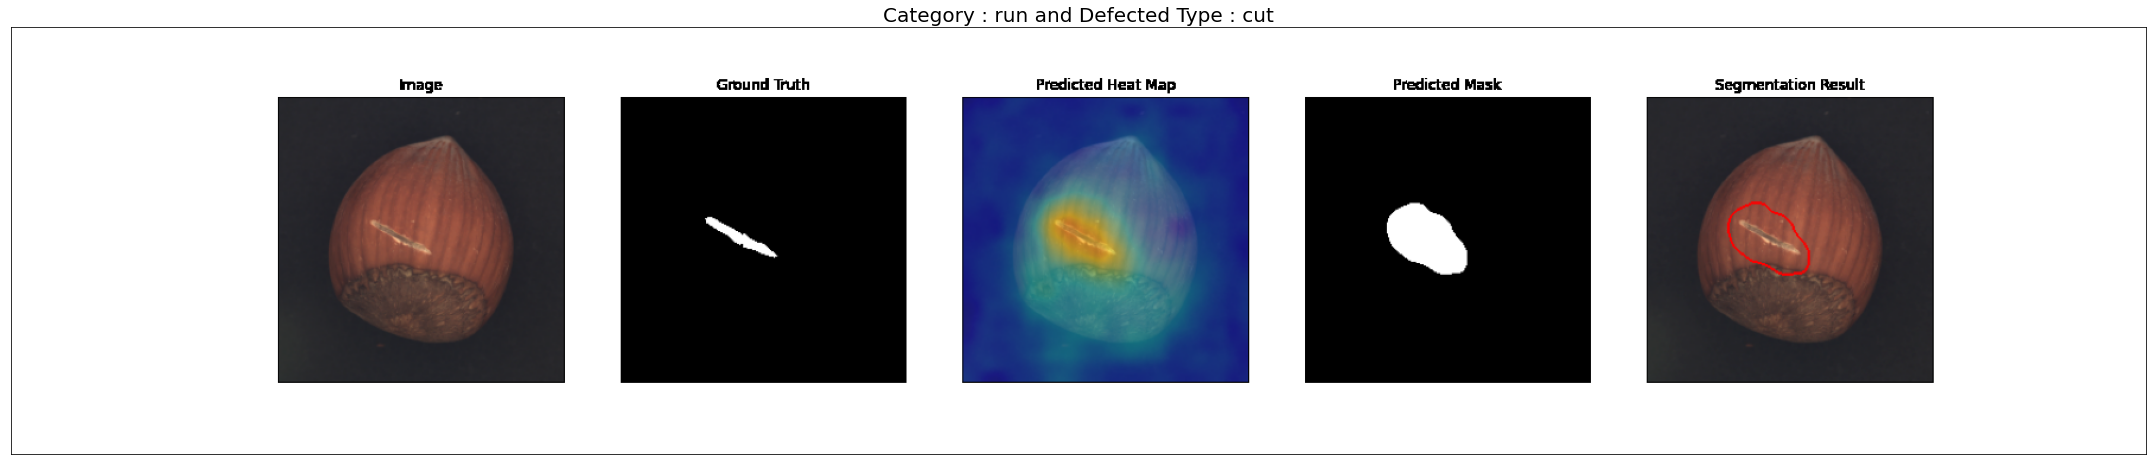

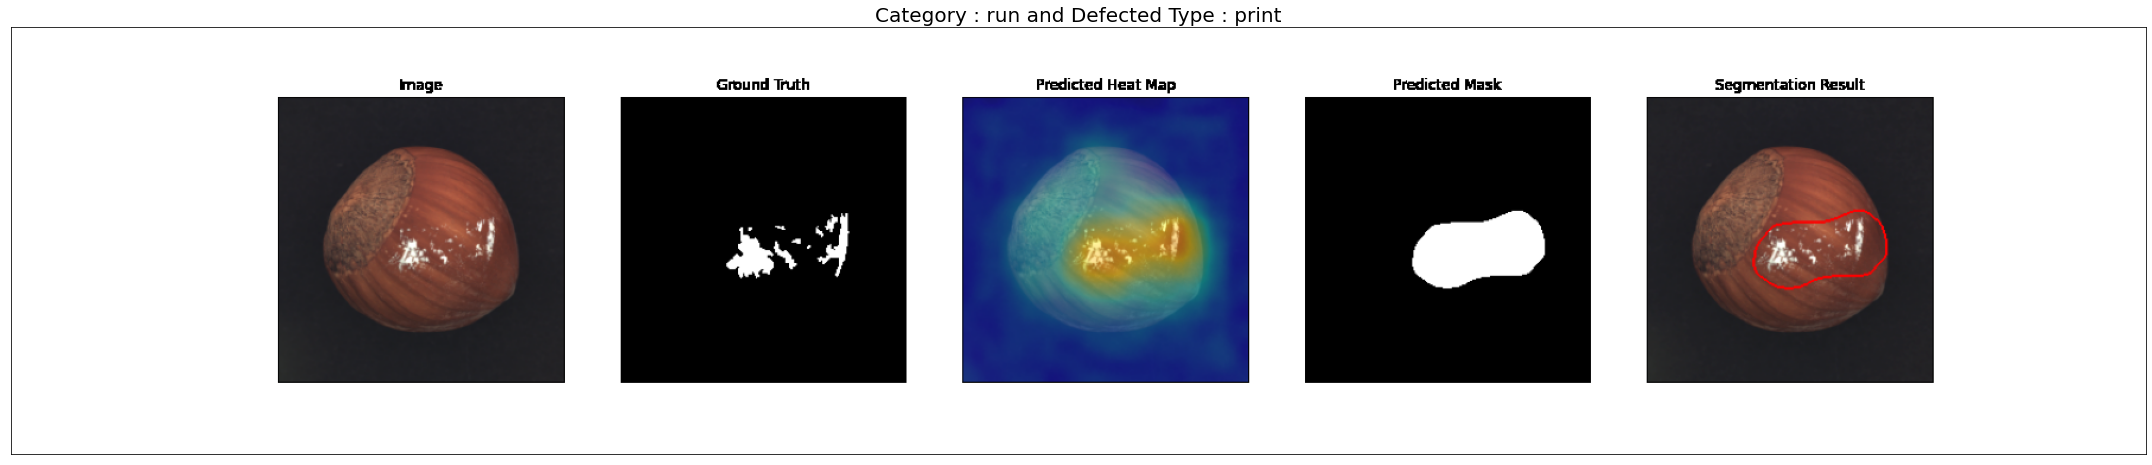

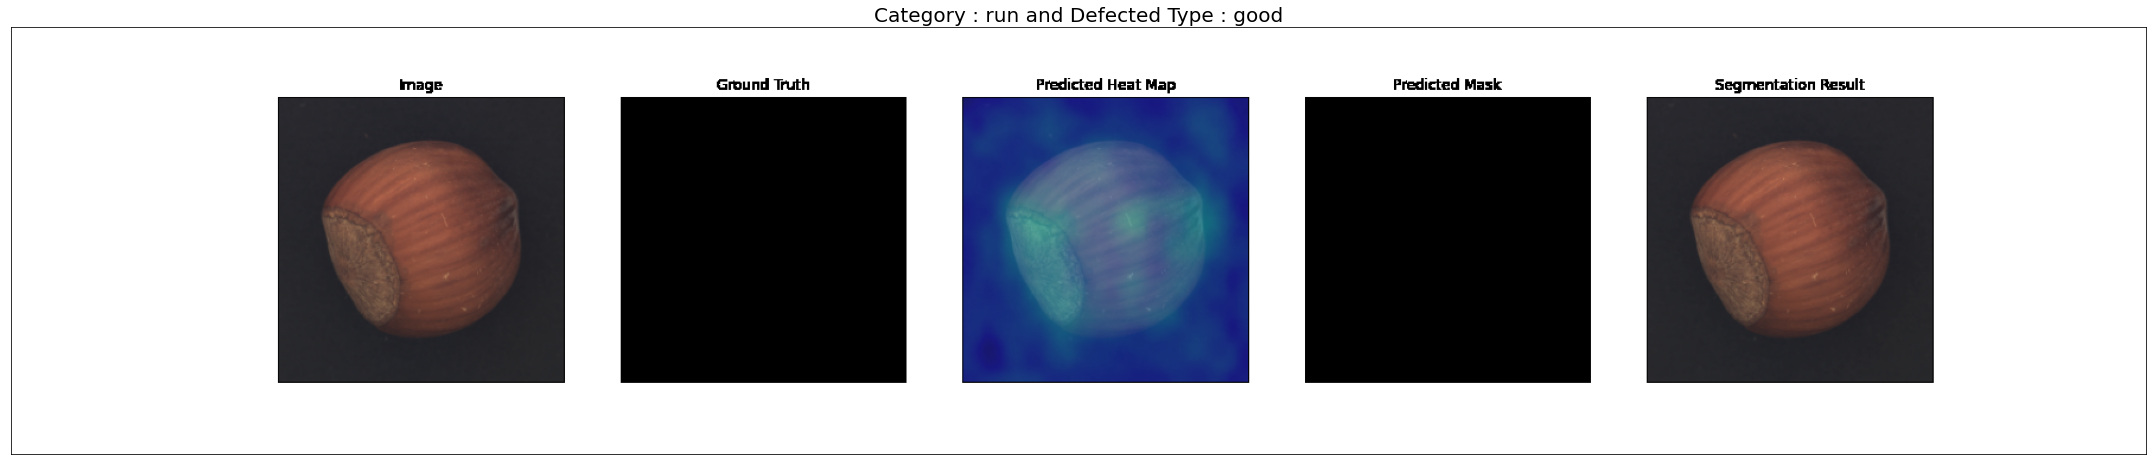

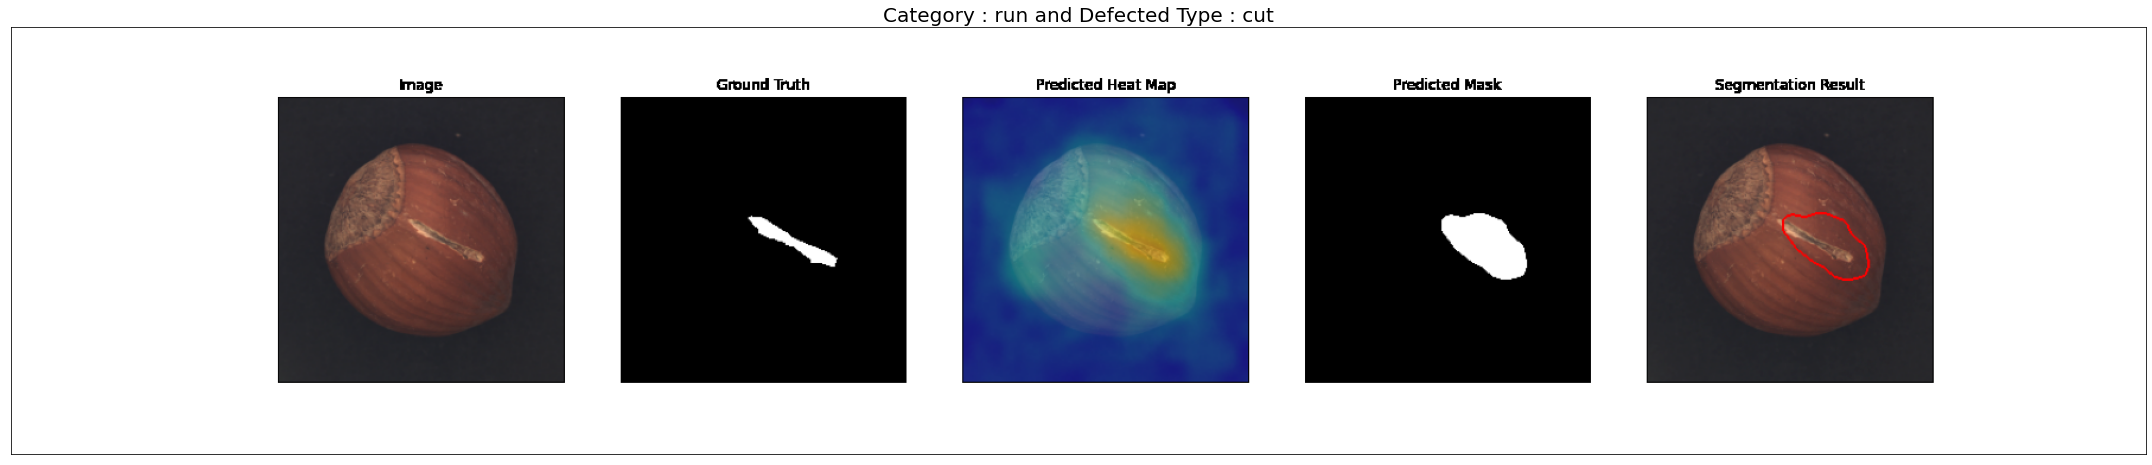

In [50]:
vis(full_path, 10, is_random=True, figsize=(30, 30))

In [52]:
# inference
from torchvision.datasets.folder import IMG_EXTENSIONS

img_paths = sorted(
        [
            os.path.join(dirpath,filename) 
            for dirpath, _, filenames in os.walk(
                os.path.join(config.dataset.path, config.dataset.category, 'test')
            )
            for filename in filenames if filename.endswith(IMG_EXTENSIONS) 
            and not filename.startswith(".")
        ],
    )

img_paths = [img_path for img_path in img_paths if not "good" in img_path]
img_paths = random.sample(img_paths, 2)
img_paths

['/content/anomal/anomalib/models/hazelnut/test/cut/010.png',
 '/content/anomal/anomalib/models/hazelnut/test/hole/001.png']

In [58]:
!python tools/inference/torch_inference.py  \
    --config /content/anomal/configs/patchcore_custom.yaml \
    --weights /content/anomal/anomalib/models/patchcore/mvtec/hazelnut/run/weights/model.ckpt \
    --input /content/anomal/anomalib/models/hazelnut/test/cut/010.png

/usr/local/lib/python3.8/dist-packages/anomalib/config/config.py:153: DeprecationWarning: The 'test_batch_size' parameter is deprecated and will be removed in a future release. Please use 'eval_batch_size' instead.
  warn(
/usr/local/lib/python3.8/dist-packages/anomalib/config/config.py:275: UserWarning: config.project.unique_dir is set to False. This does not ensure that your results will be written in an empty directory and you may overwrite files.
  warn(
/usr/local/lib/python3.8/dist-packages/torchmetrics/utilities/prints.py:36: DeprecationWarning: From v0.10 an `'Binary*'`, `'Multiclass*', `'Multilabel*'` version now exist of each classification metric. Moving forward we recommend using these versions. This base metric will still work as it did prior to v0.10 until v0.11. From v0.11 the `task` argument introduced in this metric will be required and the general order of arguments may change, such that this metric will just function as an single entrypoint to calling the three speci